In [1]:
# Import statements required

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls




In [3]:
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')



In [4]:
#Importing Files

%pwd
#%cd C:\Users\jatinder\Desktop\Programming for Data Science

File1 = pd.read_csv("all_house_senate_2010.csv", low_memory=False)
File2 = pd.read_csv("all_house_senate_2012.csv", low_memory=False)
File3= pd.read_csv("all_house_senate_2014.csv", low_memory=False)
File4= pd.read_csv("all_house_senate_2016.csv", encoding='ISO-8859-1',low_memory=False)


C:\Users\jatinder\Desktop\Programming for Data Science


In [5]:
# just to check all files are loaded correctly
File1.head()
File2.head()
File3.head()
File4.head()

,com_id,com_nam,can_id,can_nam,ele_yea,can_off,can_off_sta,can_off_dis,lin_num,lin_ima,...,rec_zip,dis_dat,dis_amo,dis_pur_des,mem_cod,mem_tex,cat_cod,cat_des,tra_id,bac_ref_id
0,C00501197,BETO FOR TEXAS,H2TX16185,"O'ROURKE, ROBERT BETO",2016,H,TX,16.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?201610...,...,021440031,2016-09-04,$60.31,CREDIT CARD PROCESSING FEE,NaN,NaN,001,Administrative/Salary/Overhead Expenses,VNH3SA44QC4,NaN
1,C00501197,BETO FOR TEXAS,H2TX16185,"O'ROURKE, ROBERT BETO",2016,H,TX,16.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?201610...,...,799285879,2016-08-01,"$2,000.00",STRATEGIC CONSULTING,NaN,NaN,001,Administrative/Salary/Overhead Expenses,VNH3SA1RX37,NaN
2,C00501197,BETO FOR TEXAS,H2TX16185,"O'ROURKE, ROBERT BETO",2016,H,TX,16.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?201610...,...,917618520,2016-07-13,$297.73,PRINTING,NaN,NaN,001,Administrative/Salary/Overhead Expenses,VNH3SA1R6Q6,NaN
3,C00437913,OLSON FOR CONGRESS COMMITTEE,H8TX22107,"OLSON, PETER G.",2016,H,TX,22.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?201610...,...,200031164,2016-08-02,$25.00,CREDIT CARD FEES,NaN,NaN,NaN,NaN,BAC5DFDF196944972A16,NaN
4,C00473736,ELECT BLAKE FARENTHOLD COMMITTEE,H0TX27061,"FARENTHOLD, RANDOLPH BLAKE",2016,H,TX,27.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?201610...,...,940431126,2016-07-05,$6.05,MERCHANT FEES,NaN,NaN,NaN,NaN,B130EE342D8A34C4EBB8,NaN


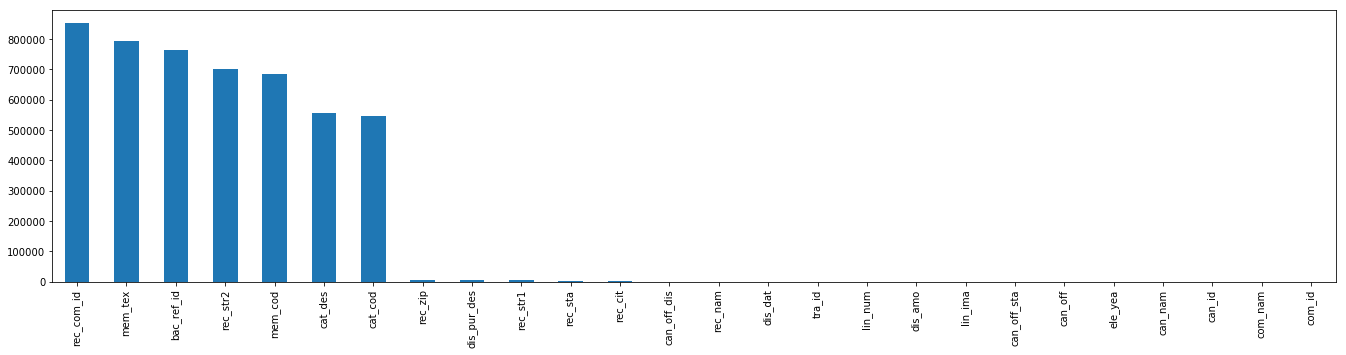

In [6]:
# Looking for NaN

File1.isnull().any()
nulls = File1.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (23,5))

File2.isnull().any()
nulls = File2.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (23,5))

File3.isnull().any()
nulls = File3.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (23,5))

File4.isnull().any()
nulls = File4.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (23,5))

In [7]:
#concatinating two or more files

# For first two files, then combination of three files and finally last two

db=pd.concat([File1,File2])

db1=pd.concat([File1,File2,File3,File4])

db2=pd.concat([File3,File4])



In [8]:
# removing $ or space 

db['dis_amo'] = (db['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ).astype(float))

db1['dis_amo'] = (db1['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ).astype(float))

db2['dis_amo'] = (db2['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ).astype(float))



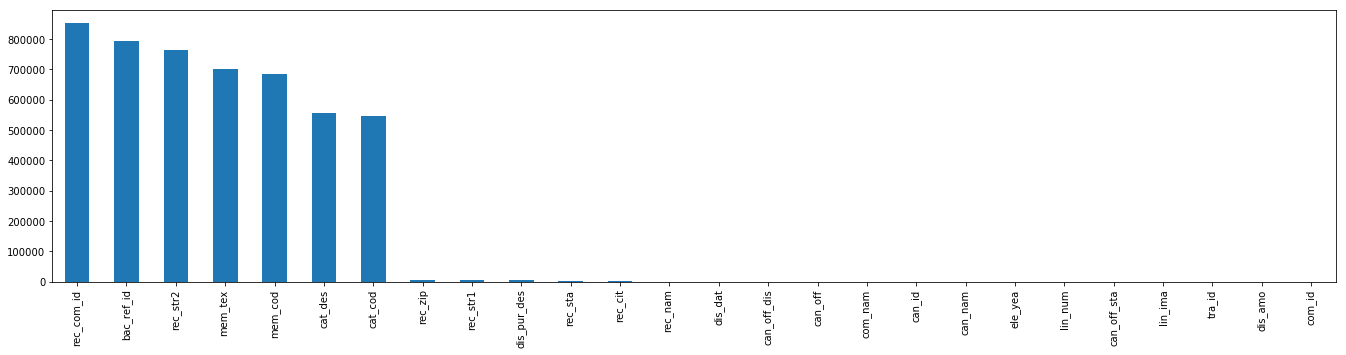

In [10]:
#looking for NAN values in the combined data set

db.isnull().any()
nulls = File1.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (23,5))

db1.isnull().any()
nulls = File2.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (23,5))

db2.isnull().any()
nulls = File3.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (23,5))



In [11]:
#dropping coloumns which are not needed

dbb=db[['com_id','com_nam','can_id','can_nam','ele_yea','can_off','can_off_sta','dis_dat','dis_amo','dis_pur_des',
         'rec_cit','rec_com_id','rec_nam','rec_sta']]
dbb1=db1[['com_id','com_nam','can_id','can_nam','ele_yea','can_off','can_off_sta',
         'dis_dat','dis_amo','dis_pur_des','rec_cit','rec_com_id','rec_nam','rec_sta']]
dbb2=db2[['com_id','com_nam','can_id','can_nam','ele_yea','can_off','can_off_sta',
         'dis_dat','dis_amo','dis_pur_des','rec_cit','rec_com_id','rec_nam','rec_sta']]

In [12]:
#calculting average disbursed amount for first two year, last two years and combined average of all the years
x=dbb.agg({'dis_amo' : np.mean})
x

# similarly for second dataset
y=dbb1.agg({'dis_amo' : np.mean})
y

# similarly for third dataset
z=dbb2.agg({'dis_amo' : np.mean})
z

#Plot showing average disbursed amount during 3 different phases 2010-2012,2014-2016 and last point indicating all 4 years

plt.plot([x,z,y])
plt.ylabel('Avg disbursed amount')
plt.show()

dis_amo    2232.045471
dtype: float64

#Plot 1

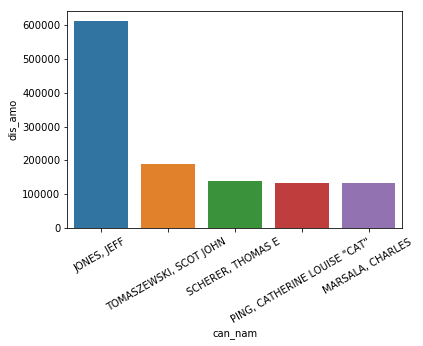

In [15]:
# Plot for top 5 member with highest disbursed amount

db1=pd.concat([File1,File2,File3,File4])
db1['dis_amo'] = (db1['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ).astype(float))
dbb1=db1[['com_id','com_nam','can_id','can_nam','ele_yea','can_off','can_off_sta',
         'dis_dat','dis_amo','dis_pur_des','rec_cit','rec_com_id','rec_nam','rec_sta']]


dbb1=dbb1.groupby(['can_nam','can_off_sta'])['dis_amo'].mean().sort_values(ascending=False).iloc[:5]


dbb1=dbb1.add_suffix(' ').reset_index()

g=sns.barplot(x='can_nam',y='dis_amo', data=dbb1)

g.set_xticklabels(g.get_xticklabels(),rotation=30)

In [ ]:
# Plot 2

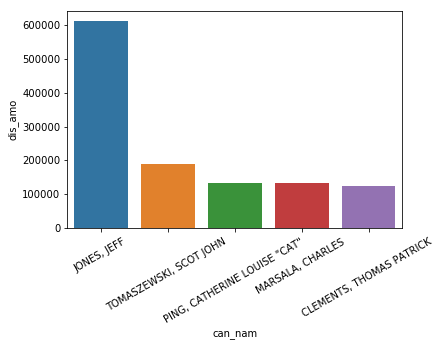

In [16]:
# Top 5 members with highest disbursed amount in 2016


dbb2=dbb2.groupby(['can_nam','can_off_sta'])['dis_amo'].mean().sort_values(ascending=False).iloc[:5]

dbb2=dbb2.add_suffix(' ').reset_index()

g=sns.barplot(x='can_nam',y='dis_amo', data=dbb2)

g.set_xticklabels(g.get_xticklabels(),rotation=30)

#Plot 3

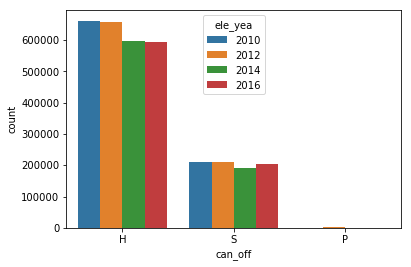

In [17]:
# house senate and president count for different years


db1=pd.concat([File1,File2,File3,File4])
db1['dis_amo'] = (db1['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ).astype(float))
dbb1=db1[['com_id','com_nam','can_id','can_nam','ele_yea','can_off','can_off_sta',
         'dis_dat','dis_amo','dis_pur_des','rec_cit','rec_com_id','rec_nam','rec_sta']]


sns.countplot(x='can_off',data=dbb1,hue='ele_yea', order=dbb1.can_off.value_counts().iloc[:5].index)


In [ ]:
# Plot 4

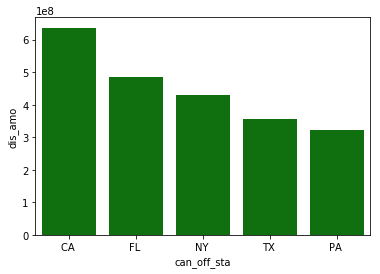

In [18]:
# Top 5 states with highest disbursed amount overall in all the years


dbb11=dbb1.groupby(['can_off_sta'])['dis_amo'].sum().sort_values(ascending=False)
dbb11=dbb11.add_suffix(' ').reset_index()
plt.figure()
sns.barplot(x='can_off_sta',y='dis_amo', data=dbb11.iloc[:5],color='green')


In [ ]:
# Plot 5

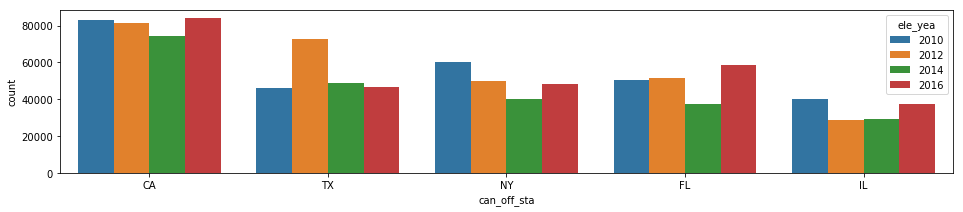

In [20]:
#Plot to show top candidate cities with max disbursed amount on elections

plt.figure(figsize=(16,3))
sns.countplot(x='can_off_sta',data=dbb1,hue='ele_yea', order=dbb1.can_off_sta.value_counts().iloc[:5].index)

In [ ]:
# Plot 6

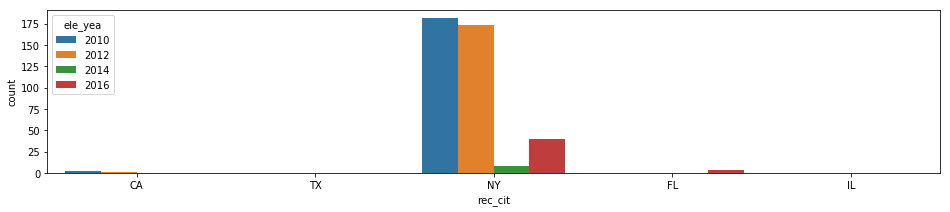

In [21]:
#Plot to show top recipient cities with max disbursed amount on elections

plt.figure(figsize=(16,3))
sns.countplot(x='rec_cit',data=dbb1,hue='ele_yea', order=dbb1.can_off_sta.value_counts().iloc[:5].index)

In [ ]:
# Plot 7

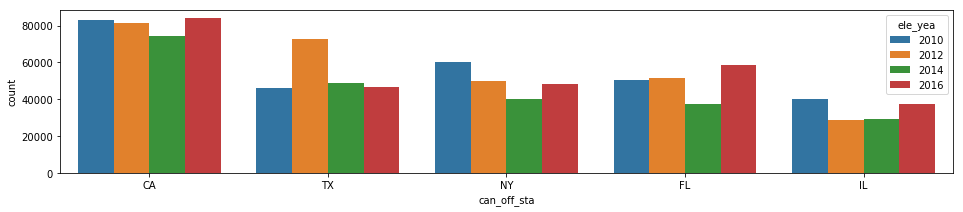

In [22]:
#Plot to show top cities with max disbursed amount on elections

plt.figure(figsize=(16,3))
sns.countplot(x='can_off_sta',data=dbb1,hue='ele_yea', order=dbb1.can_off_sta.value_counts().iloc[:5].index)

In [ ]:
# Plot 8

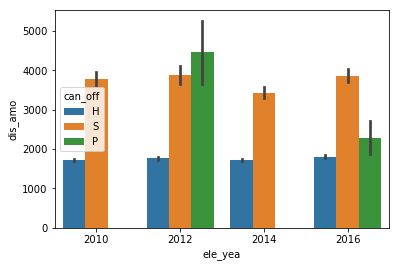

In [23]:
#plot for election year and disbursed amount varying according to different candidate office

sns.barplot(x='ele_yea',y='dis_amo',hue='can_off', data=dbb1)
plt.figure()








In [ ]:
# Plot 9

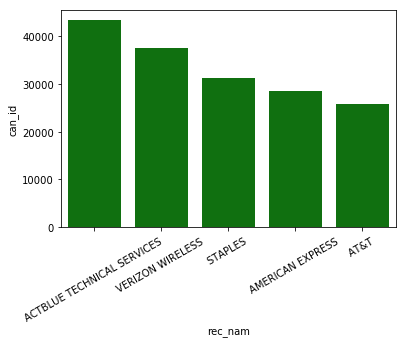

In [ ]:
# Top 5 recipient name with maximum count 


db1=pd.concat([File1,File2,File3,File4])
db1['dis_amo'] = (db1['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ).astype(float))
dbb1=db1[['com_id','com_nam','can_id','can_nam','ele_yea','can_off','can_off_sta',
         'dis_dat','dis_amo','dis_pur_des','rec_cit','rec_com_id','rec_nam','rec_sta']]

dbb21=dbb1.groupby('rec_nam')['can_id'].count().sort_values(ascending= False)
dbb21=dbb21.add_suffix(' ').reset_index()
plt.figure()
j=sns.barplot(y='can_id',x='rec_nam', data=dbb21.iloc[:5],color='green')
j.set_xticklabels(j.get_xticklabels(),rotation=30)

In [ ]:
# Plot 10

In [ ]:
# Plot to show top 5 different areas where disbursed amount was spent


f=sns.barplot(x='dis_pur_des',data=dbb1,hue='ele_yea', order=dbb1.dis_pur_des.value_counts().iloc[:5].index)
f.set_xticklabels(f.get_xticklabels(),rotation=30)

#### Thanks : Jatinder Singh